# Random Forest Classifier

In [2]:
from datasets import load_dataset
import tqdm as tqdm

regression_dataset_tmdb_raw_df = load_dataset("ada-datadruids/regression_dataset_tmdb")['train'].to_pandas()

print(len(regression_dataset_tmdb_raw_df))
regression_dataset_tmdb_raw_df.head()

8353


id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

                                            overview popularity  \
0  Cobb, a skilled thief who commits corporate es...     83.952   
1  The adventures of a group of explorers who mak...    140.241   
2  Batman raises the stakes in his war on crime. ...    130.643   
3  In the 22nd century, a paraplegic Marine is di...     79.932   
4  When an unexpected enemy emerges and threatens...     98.082   

                        poster_path  \
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3  /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   
3                    English, Spanish   
4             English, Hindi, Russian   

                                            keywords based_on_book  
0  rescue, mission, dream, airplane, paris, franc...         False  
1  rescue, future, spacecraft, race against time,...         False  
2  joker, sadism, chaos, secret identity, crime f...         False  
3  future, society, culture clash, space travel, ...         False  
4  new york city, superhero, shield, based on com...         False  

[5 rows x 25 columns]

In [3]:
from utils.regression_utils import adjust_for_inflation

regression_dataset_tmdb_raw_df = adjust_for_inflation(regression_dataset_tmdb_raw_df, ['budget', 'revenue'], is_plotting_enabled=False)
regression_dataset_tmdb_raw_df.head()

id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   
3                    English, Spanish   
4             English, Hindi, Russian   

                                            keywords  based_on_book  \
0  rescue, mission, dream, airplane, paris, franc...          False   
1  rescue, future, spacecraft, race against time,...          False   
2  joker, sadism, chaos, secret identity, crime f...          False   
3  future, society, culture clash, space travel, ...          False   
4  new york city, superhero, shield, based on com...          False   

  movie_year adjusted_budget adjusted_revenue  
0       2010    1.737071e+08     8.962556e+08  
1       2014    1.650000e+08     7.017292e+08  
2       2008    2.034170e+08     1.104564e+09  
3       2009    2.615235e+08     3.226236e+09  
4       2012    2.268438e+08     1.566063e+09  

[5 rows x 28 columns]

We will keep the budget here

In [4]:
from utils.regression_utils import multi_one_hot_encode_columns

# Might want to keep release data in the future???
# production companies removed as there are over 100'000 unique values
regression_dataset_tmdb_raw_df.drop(columns=['keywords', 'id', 'title', 'release_date', 'backdrop_path', 'homepage', 'original_title','budget', 'overview', 'poster_path', 'tagline', 'production_companies', 'original_language', 'revenue', 'imdb_id'], inplace=True)

regression_dataset_processed_df = multi_one_hot_encode_columns(
    regression_dataset_tmdb_raw_df,
    column_names_mohe=['genres', 'spoken_languages', 'production_countries'], # keywords not taken for now
    column_names_ohe=['status'],
)


In [5]:
regression_dataset_processed_df.head()

vote_average  vote_count  runtime  adult  popularity  based_on_book  \
0         8.364       34495      148  False      83.952          False   
1         8.417       32571      169  False     140.241          False   
2         8.512       30619      152  False     130.643          False   
3         7.573       29815      162  False      79.932          False   
4         7.710       29166      143  False      98.082          False   

   movie_year  adjusted_budget  adjusted_revenue  genres_count  ...  \
0        2010     1.737071e+08      8.962556e+08             3  ...   
1        2014     1.650000e+08      7.017292e+08             3  ...   
2        2008     2.034170e+08      1.104564e+09             4  ...   
3        2009     2.615235e+08      3.226236e+09             4  ...   
4        2012     2.268438e+08      1.566063e+09             3  ...   

   production_countries_China  production_countries_France  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   production_countries_Germany  production_countries_India  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

   production_countries_Italy  production_countries_Japan  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   production_countries_Russia  production_countries_Spain  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   production_countries_United Kingdom  \
0                                    1   
1                                    1   
2                                    1   
3                                    1   
4                                    0   

   production_countries_United States of America  
0                                              1  
1                                              1  
2                                              1  
3                                              1  
4                                              1  

[5 rows x 50 columns]

## Not separated if based on book or not

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.model_selection import KFold

In [7]:
from utils.regression_utils import create_train_test_split
# DATA PREPROCESSING
X_train, X_test, y_train, y_test = create_train_test_split(
    regression_dataset_processed_df, 
    target_column='adjusted_revenue', 
    should_split_based_on_book=False, 
    test_size=0.2, 
    seed=42
)['all']

In [8]:
# # HYPERPARAMETERS

# param_grid = {

#     'n_estimators': [100, 150, 200, 300],

#     'max_depth': [5, 10, 15, 20, 30],

#     'min_samples_split': [2, 5, 10],

#     'min_samples_leaf': [1, 2, 4],
 
#     'bootstrap': [True]

# }

# model = RandomForestRegressor(random_state=42)
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train.ravel())
# best_params = grid_search.best_params_
# print('Best parameters:', best_params)


{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

In [9]:
# Train final model with best parameters
#best_model = RandomForestRegressor(**best_params, random_state=42)
best_model = RandomForestRegressor(bootstrap= True, max_depth= 15, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42)
best_model.fit(X_train, y_train.ravel())

predictions = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Validation error (RMSE):', rmse)
r2 = r2_score(y_test, predictions)
print('R^2 Score:', r2)

Validation error (RMSE): 160185845.71105555
R^2 Score: 0.4226994746716344


In [10]:
#install dtreeviz and graphviz
import dtreeviz
# X_train_tree = regression_dataset_processed_df.drop(columns=['adjusted_revenue'])
# y_train_tree = regression_dataset_processed_df['adjusted_revenue']

clf = DecisionTreeRegressor(max_depth = 5, max_leaf_nodes=7, random_state=42)
clf.fit(X_train, y_train)


# Visualize the decision tree
viz = dtreeviz.model(clf, 
            X_train, 
            y_train, 
            target_name='adjusted_revenue', 
            feature_names=X_train.columns)

viz.view()  


/Users/danjazengaffinen/anaconda3/envs/ada/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


In [25]:
color_palette = {
    # Genres in dark grey except genres_adventure
    **{f'genres_{genre}': ('#882255' if genre == 'Adventure' else 'grey') for genre in [
        'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 
        'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War']},
    # Production Countries in dark grey except production_countries_United States of America
    **{f'production_countries_{country}': ('#CC6677' if country == 'United States of America' else 'grey') for country in [
        'Australia', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Russia', 
        'Spain', 'United Kingdom', 'United States of America']},
    # Spoken Languages in dark grey
    **{f'spoken_languages_{lang}': 'grey' for lang in [
        'English', 'French', 'German', 'Hindi', 'Italian', 'Japanese', 'Mandarin', 'Russian', 'Spanish', 'count']},
    # Others with specific colors
    'const': '#2E2E2E',
    'vote_count': '#88CCEE',
    'genres_count': '#999933',
    'runtime': '#2E2E2E',
    'adult': 'grey',
    'popularity': '#117733',
    'movie_year': '#44AA99',
    'adjusted_budget': '#DDCC77',
    'adjusted_revenue': '#999933',
    'based_on_book': '#AA4499',
    'vote_average': '#332288'
}

In [26]:
import plotly.express as px
import pandas as pd


# Create interactive bar chart
fig = px.bar(
    feature_importances.head(10),
    y='Feature',
    x='Importance',
    color='Feature',
    color_discrete_map=color_palette,
)

fig.update_layout(
    title=dict(
        text="Random Forest Importances of Bobs and Nobs",  
        x=0.02, 
    ),
    yaxis=dict(
        title="",
        tickmode="array",
    ),
    template="plotly_white",
    width=None,
    height=None,     
    showlegend=False,

)

# Add tooltips for better interactivity
fig.update_traces(
    hovertemplate='<b>%{y}</b><br>Importance: %{x:.3f}<extra></extra>'
)

fig.show()


In [27]:
html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <style>
                .plotly-graph-div {{
                    width: 100% !important;
                    height: 100% !important;
                }}
            </style>
        </head>
        <body>
            <div id="plotly-div"></div>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <script>
                var plotly_data = {fig.to_json()};
                Plotly.newPlot('plotly-div', plotly_data.data, plotly_data.layout);
            </script>
        </body>
        </html>
        """
with open('random_forest_importances.html', 'w') as f:
    f.write(html_content)

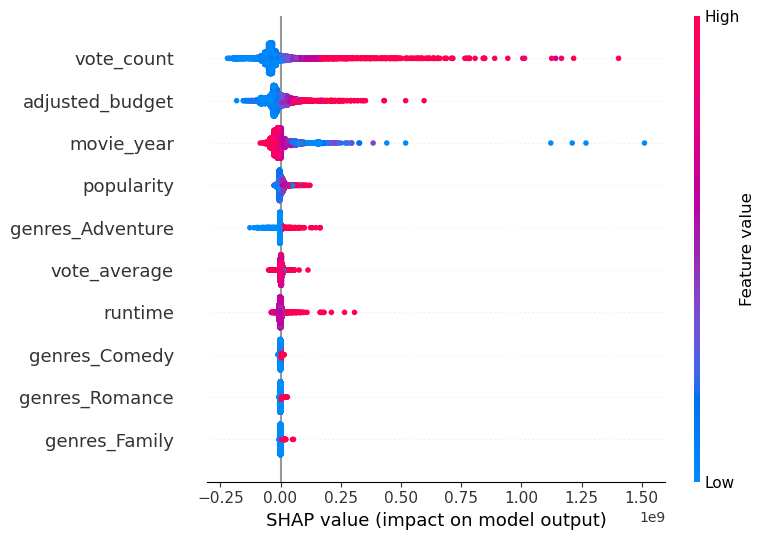

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd


# Create the SHAP explainer and compute SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, max_display=10, show = False)
#plt.savefig('movies_shap.svg', format='svg', dpi = 1200)

## Separated for based on Book

In [14]:
split_dict = create_train_test_split(
    regression_dataset_processed_df,
    target_column='adjusted_revenue',
    should_split_based_on_book=True,
    test_size=0.2,
    seed=42
)
X_train_based_on_book, X_test_based_on_book, y_train_based_on_book, y_test_based_on_book = split_dict['based_on_book']
X_train_not_based_on_book, X_test_not_based_on_book, y_train_not_based_on_book, y_test_not_based_on_book = split_dict['not_based_on_book']

### Based on Book

We will redo the hyperparameter tuning here since the best hyperparameters from all samples lead to a very low R^2 value with only movies based on book: 

Before: 
Best parameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Validation error (MSE): 3.867101344340629e+17
R^2 Score: 0.15444854635742156

In [15]:
param_grid = {
    'n_estimators': [200, 250, 300, 350], #it always picks the highest one so we do not need to redo the tuning for low number of estimators
    'max_depth': [5, 10, 20, None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],  
    'bootstrap': [True]                  
}

model = RandomForestRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train_based_on_book, y_train_based_on_book.ravel())
best_params_based_on_book = grid_search.best_params_
print('Best parameters:', best_params_based_on_book)

Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}


In [16]:
# Train final model with best parameters
best_model = RandomForestRegressor(**best_params_based_on_book, random_state=42)
best_model.fit(X_train_based_on_book, y_train_based_on_book.ravel())

predictions = best_model.predict(X_test_based_on_book)

rmse = np.sqrt(mean_squared_error(y_test_based_on_book, predictions))
print('Validation error (RMSE):', rmse)
r2 = r2_score(y_test_based_on_book, predictions)
print('R^2 Score:', r2)

Validation error (RMSE): 619833132.8157822
R^2 Score: 0.15995207816343393


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
importances = best_model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train_based_on_book.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create interactive bar chart
fig = px.bar(
    feature_importances.head(10),
    y='Feature',
    x='Importance',
    color='Feature',
    color_discrete_map=color_palette,
)

fig.update_layout(
    title=dict(
        text="Random Forest Importances of Bobs",  
        x=0.02, 
    ),
    yaxis=dict(
        title="",
        tickmode="array",
    ),
    template="simple_white",
    width=800,
    height=650,     
    showlegend=False,

)

# Add tooltips for better interactivity
fig.update_traces(
    hovertemplate='<b>%{y}</b><br>Importance: %{x:.3f}<extra></extra>'
)

fig.show()

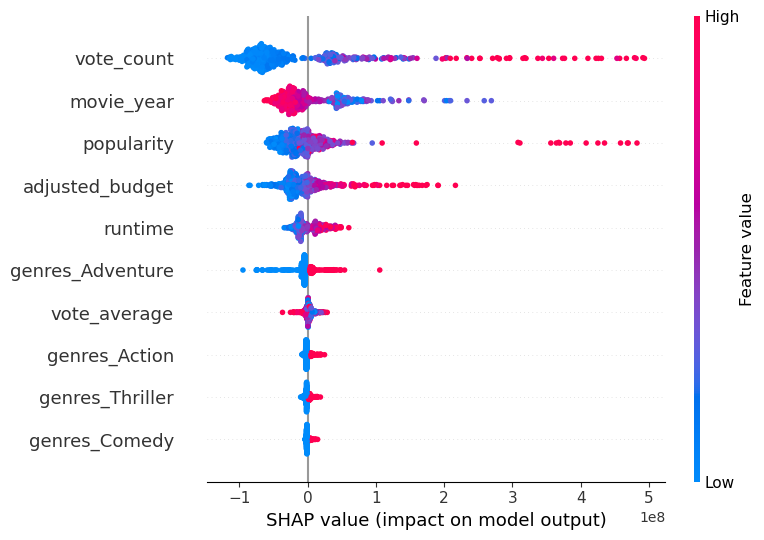

In [18]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_based_on_book)

shap.summary_plot(shap_values, X_train_based_on_book, max_display=10)

### Not based on book

Here there is probably no need to redo the hyperparameter tuning since we can achieve a higher R^2 value already

In [19]:
best_model = RandomForestRegressor(bootstrap= True, max_depth= 15, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100, random_state=42)
best_model.fit(X_train_not_based_on_book, y_train_not_based_on_book.ravel())

predictions = best_model.predict(X_test_not_based_on_book)
rmse = np.sqrt(mean_squared_error(y_test_not_based_on_book, predictions))
print('Validation error (RMSE):', rmse)
r2 = r2_score(y_test_not_based_on_book, predictions)
print('R^2 Score:', r2)

Validation error (RMSE): 102978588.93473381
R^2 Score: 0.6466890703560536


In [20]:
importances = best_model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train_not_based_on_book.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Create interactive bar chart
fig = px.bar(
    feature_importances.head(10),
    y='Feature',
    x='Importance',
    color='Feature',
    color_discrete_map=color_palette
)

fig.update_layout(
    title=dict(
        text="Random Forest Importances of Nobs",  
        x=0.02, 
    ),
    yaxis=dict(
        title="",
        tickmode="array",
    ),
    template="simple_white",
    width=800,
    height=650,     
    showlegend=False,

)

# Add tooltips for better interactivity
fig.update_traces(
    hovertemplate='<b>%{y}</b><br>Importance: %{x:.3f}<extra></extra>'
)

fig.show()

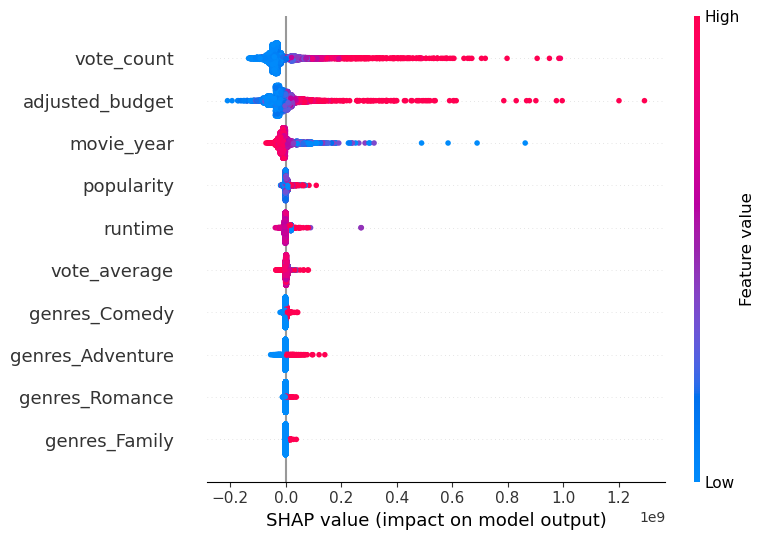

In [21]:

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_not_based_on_book)

shap.summary_plot(shap_values, X_train_not_based_on_book, max_display=10)
